# import modules..

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# helper functions (if needed)

In [2]:
# python code...    

# read in training data

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.columns)
print(test_data.columns)



Index(['car', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'mpg'],
      dtype='object')
Index(['car', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin'],
      dtype='object')


# analyze and visualize training data 

array([[<AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='horsepower', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>,
        <AxesSubplot:xlabel='model', ylabel='cylinders'>,
        <AxesSubplot:xlabel='origin', ylabel='cylinders'>,
        <AxesSubplot:xlabel='mpg', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='cylinders', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
        <AxesSubplot:xlabel='horsepower', ylabel='displacement'>,
        <AxesSubplot:xlabel='weight', ylabel='displacement'>,
        <AxesSubplot:xlabel='acceleration', ylabel='displacement'>,
        <AxesSubplot:xlabel='model', ylabel='displacement'>,
        <AxesSubplot:xlabel='origin', ylabel='displacement'>,
        <AxesSubplot:xlabel='mpg', ylabel='displacement'>],


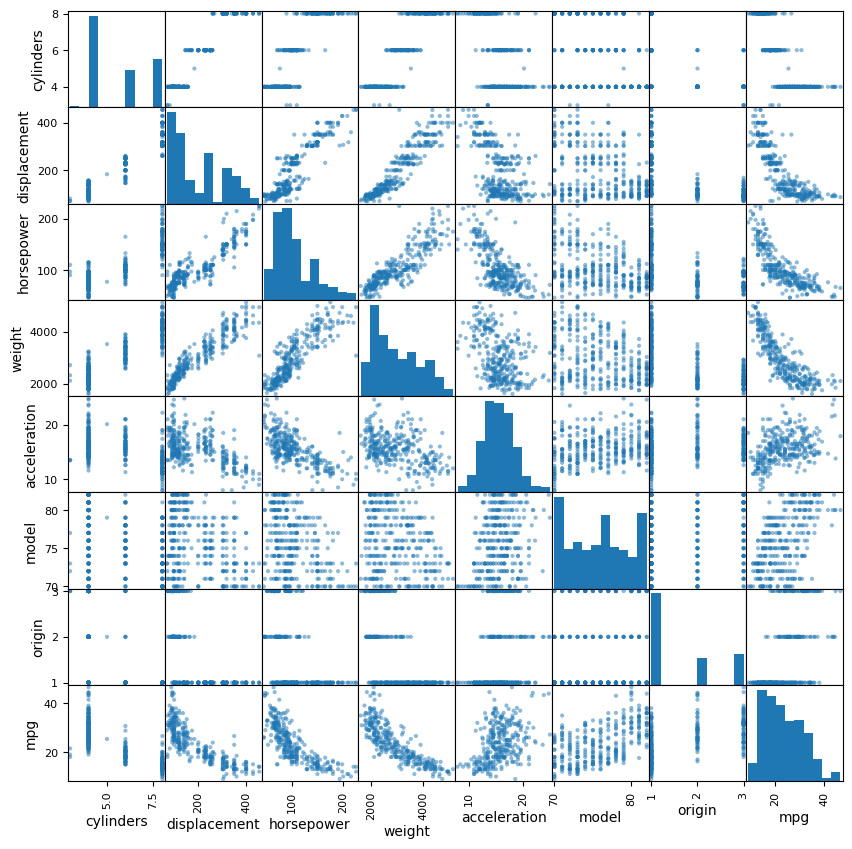

In [7]:
train_data.head()
train_data.isnull().sum()
train_data.dtypes
train_data.describe()
train_data.corr()

pd.plotting.scatter_matrix(train_data, figsize=(10,10))


# experiment with building models to predict training data mpg

In [8]:
train_data = train_data.drop("car", axis=1)
test_data = test_data.drop("car", axis=1)

train_data = train_data.fillna(train_data.median())
test_data = test_data.fillna(test_data.median())


scaler = StandardScaler()
train_data[train_data.columns[:-1]] = scaler.fit_transform(train_data[train_data.columns[:-1]])

test_data = test_data[train_data.columns[:-1]]
test_data[test_data.columns] = scaler.transform(test_data[test_data.columns])

X_train = train_data[train_data.columns[:-1]]
y_train = train_data["mpg"]

X_train = pd.get_dummies(X_train, columns=["origin"])
test_data = pd.get_dummies(test_data, columns=["origin"])
test_data = test_data.reindex(columns=X_train.columns, fill_value=0)


In [9]:
#Linear Regression from this weeks slides
lr = LinearRegression()
#DecisionTreeRegressor for comparison 
dt = DecisionTreeRegressor(random_state=0)
#RandomForestRegressor for comparison 
rf = RandomForestRegressor(random_state=0)


lr_pred = cross_val_predict(lr, X_train, y_train, cv=10)
lr_mse = mean_squared_error(y_train, lr_pred)

dt_pred = cross_val_predict(dt, X_train, y_train, cv=10)
dt_mse = mean_squared_error(y_train, dt_pred)

rf_pred = cross_val_predict(rf, X_train, y_train, cv=10)
rf_mse = mean_squared_error(y_train, rf_pred)

print("Linear Regression MSE:", lr_mse)
print("Decision Tree MSE:", dt_mse)
print("Random Forest MSE:", rf_mse)


Linear Regression MSE: 12.539483163306315
Decision Tree MSE: 15.231200000000001
Random Forest MSE: 8.11904338461538


# Question: What features and model parameters worked "best"?  Why?

Based on the results Random Forest MSE is the best most likely becasue of how the model handles relationships between different collumns and in the case of MPG there is a lot of factor working together 

# train "fresh" mpg prediction model on training data

In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#fresh Random forest 
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# read in test data

In [21]:
test_data = pd.read_csv('test.csv')

# use trained model to predict mpg of test data

In [22]:
test_data = test_data.drop("car", axis=1)
test_data = test_data.fillna(test_data.median())
test_data[test_data.columns] = scaler.transform(test_data[test_data.columns])
test_data = pd.get_dummies(test_data, columns=["origin"])

X_test = test_data.reindex(columns=X_train.columns, fill_value=0)

y_pred = rf_model.predict(X_test)

# write test data with predicted mpg to \<YourLastName>.csv

In [36]:
y_pred = reg.predict(test_data)
results = pd.DataFrame({'mpg': y_pred})

results.to_csv('Auer.csv', index=False)
